# 1. Distancia Eunclidiana (Sin usar Kmeans)

In [ ]:
#Importanto Librerias
import matplotlib.pyplot as plt
import time
from math import sqrt
import pandas as pd

In [ ]:
# Listas de datos
x = [185, 170, 168, 179, 182, 188]
y = [72, 56, 60, 68, 72, 77]

# Listas para los puntos en los clústeres
x1 = []
y1 = []

# Variables para los centroides
centroide1 = []
centroide2 = []

In [ ]:
# Función para calcular la distancia euclidiana entre dos puntos
def calcular_distancia(x1, y1, x2, y2):
    return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

# Función para actualizar el primer centroide
def actualizar_centroide1(x, y, i):
    nuevo_centroide1 = [(centroide1[0] + x[i]) / 2, (centroide1[1] + y[i]) / 2]
    centroide1.clear()
    return nuevo_centroide1

# Función para actualizar el segundo centroide
def actualizar_centroide2(x, y, i):
    nuevo_centroide2 = [(centroide2[0] + x[i]) / 2, (centroide2[1] + y[i]) / 2]
    centroide2.clear()
    return nuevo_centroide2

In [ ]:
# Función para realizar la actualización de los centroides
def actualizar_centroides():
    suma_x1, suma_y1, suma_x2, suma_y2, cont1, cont2 = 0, 0, 0, 0, 0, 0
    for j in range(len(datos)):
        if datos[j] == 1:
            suma_x1 += x1[j]
            suma_y1 += y1[j]
            cont1 += 1
        else:
            suma_x2 += x1[j]
            suma_y2 += y1[j]
            cont2 += 1
    promedio_x1 = suma_x1 / cont1
    promedio_y1 = suma_y1 / cont1
    promedio_x2 = suma_x2 / cont2
    promedio_y2 = suma_y2 / cont2
    nuevo_centroide1 = [promedio_x1, promedio_y1]
    nuevo_centroide2 = [promedio_x2, promedio_y2]
    return nuevo_centroide1, nuevo_centroide2

# Inicialización de datos y centroides
datos = [1, 2]
centroide1 = [x[0], y[0]]
centroide2 = [x[1], y[1]]
x1.extend(x[:2])
y1.extend(y[:2])

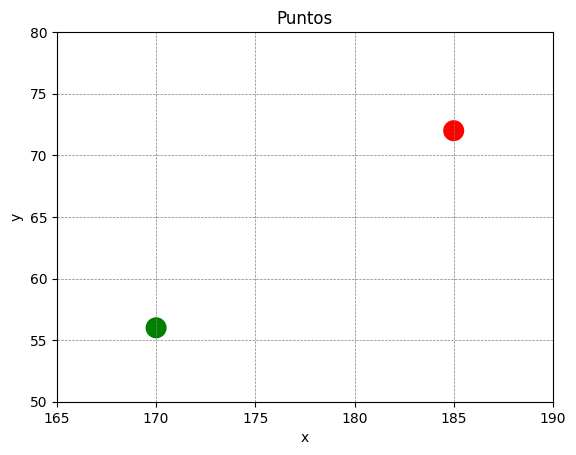

In [ ]:
# Graficar los puntos y los primeros centroides
plt.scatter(centroide1[0], centroide1[1], marker='v', color="red")
plt.scatter(centroide2[0], centroide2[1], marker='v', color="green")
plt.scatter(x[:2], y[:2], color=["red", "green"], s=200)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Puntos')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(165, 190)
plt.ylim(50, 80)
plt.show()

In [ ]:
# Algoritmo K-Means
for i in range(2, len(x)):
    distancia1 = calcular_distancia(x[i], y[i], centroide1[0], centroide1[1])
    distancia2 = calcular_distancia(x[i], y[i], centroide2[0], centroide2[1])

    if distancia1 < distancia2:
        datos.append(1)
        centroide1 = actualizar_centroide1(x, y, i)
        x1.append(x[i])
        y1.append(y[i])
    else:
        datos.append(2)
        centroide2 = actualizar_centroide2(x, y, i)
        x1.append(x[i])
        y1.append(y[i])

# Mostrar los resultados finales
print("Resultados finales:")
print("Datos:", datos)
print("Centroide 1:", centroide1)
print("Centroide 2:", centroide2)

Resultados finales:
Datos: [1, 2, 2, 1, 1, 1]
Centroide 1: [185.0, 74.0]
Centroide 2: [169.0, 58.0]


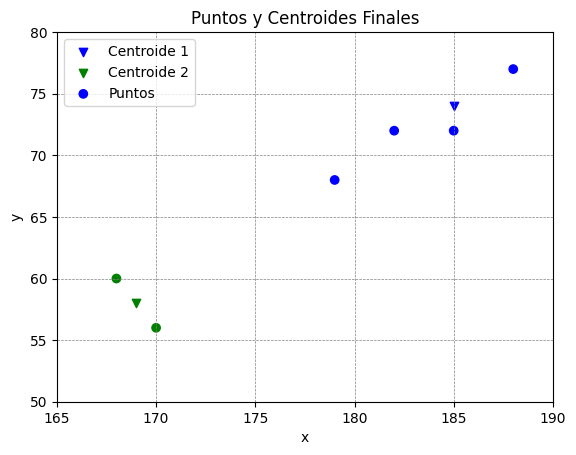

In [ ]:
# Graficar los puntos finales y los centroides finales
plt.scatter(centroide1[0], centroide1[1], marker='v', color="blue", label='Centroide 1')
plt.scatter(centroide2[0], centroide2[1], marker='v', color="green", label='Centroide 2')
plt.scatter(x1, y1, color=["blue" if d == 1 else "green" for d in datos], label='Puntos')

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Puntos y Centroides Finales')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(165, 190)
plt.ylim(50, 80)
plt.legend()
plt.show()

# 2. Distancia Eunclidiana (Usando Kmeans)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from math import sqrt

In [ ]:
# Listas de datos
x = [185, 170, 168, 179, 182, 188]
y = [72, 56, 60, 68, 72, 77]

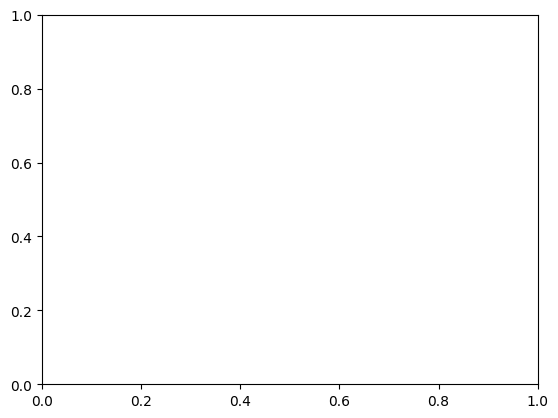

In [ ]:
# Combinar las listas de coordenadas en un solo conjunto de datos
data = list(zip(x, y))

# Número de clústeres
num_clusters = 2

# Crear un modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Inicialización de datos y centroides
datos = [1, 2]
centroide1 = [x[0], y[0]]
centroide2 = [x[1], y[1]]
x1 = [x[0], x[1]]
y1 = [y[0], y[1]]

# Crear una figura para la animación
fig, ax = plt.subplots()

In [ ]:
# Gráfico 1: Inicialización
# Muestra dos centroides iniciales y los dos primeros puntos de datos
plt.scatter(centroide1[0], centroide1[1], marker='v', color="blue", label='Centroide 1')
plt.scatter(centroide2[0], centroide2[1], marker='v', color="green", label='Centroide 2')
plt.scatter(x1, y1, color=["blue", "green"], label='Puntos')

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Puntos y Centroides Iniciales')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(165, 190)
plt.ylim(50, 80)
plt.legend()

# Mostrar el gráfico inicial
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


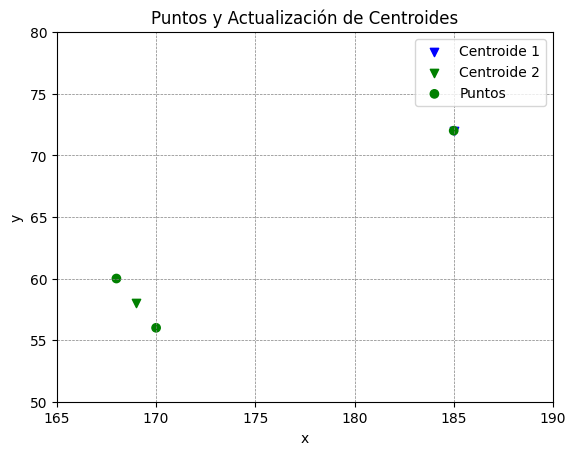

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


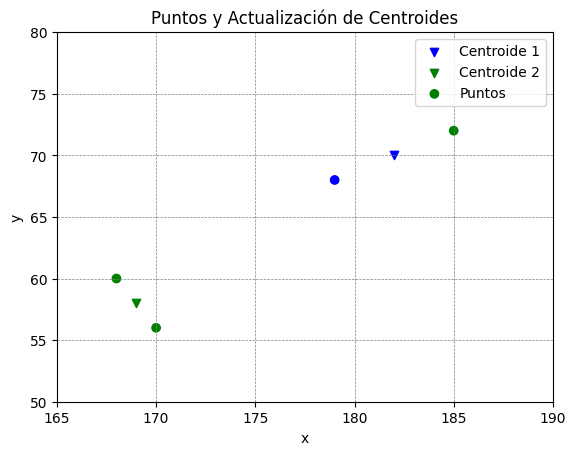

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


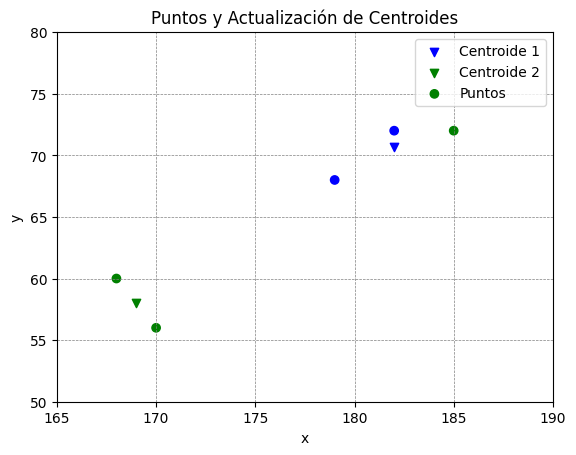

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


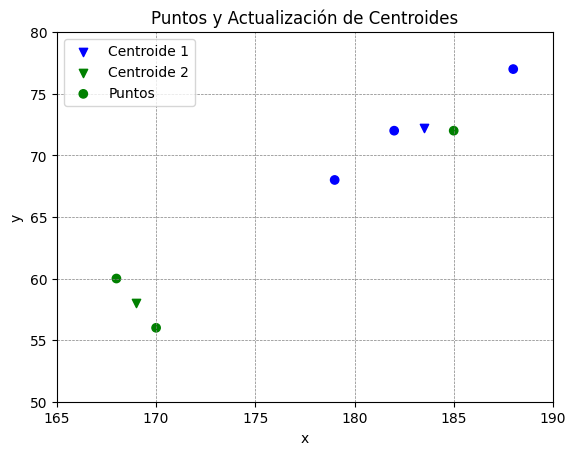

Resultados finales:
Datos: [1, 2, 1, 0, 0, 0]
Centroide 1: [183.5, 72.25]
Centroide 2: [169.0, 58.0]


In [ ]:
# Algoritmo K-Means
for i in range(2, len(x)):
    # Ajustar el modelo a los datos hasta la iteración actual
    kmeans.fit(data[:i+1])

    # Obtener las etiquetas de clúster asignadas a cada punto
    clusters = kmeans.labels_

    # Obtener las coordenadas de los centroides
    centroides = kmeans.cluster_centers_

    # Actualizar los datos
    datos.append(clusters[i])
    centroide1 = centroides[0].tolist()
    centroide2 = centroides[1].tolist()
    x1.append(x[i])
    y1.append(y[i])

    # Gráfico 2: Actualización de Centroides
    # Muestra cómo los centroides se mueven hacia el centro de sus grupos respectivos
    plt.cla()
    plt.scatter(centroide1[0], centroide1[1], marker='v', color="blue", label='Centroide 1')
    plt.scatter(centroide2[0], centroide2[1], marker='v', color="green", label='Centroide 2')
    plt.scatter(x1, y1, color=["blue" if d == 0 else "green" for d in datos], label='Puntos')

    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title('Puntos y Actualización de Centroides')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(165, 190)
    plt.ylim(50, 80)
    plt.legend()

    # Mostrar el gráfico de actualización de centroides
    plt.show()

# Mostrar los resultados finales
print("Resultados finales:")
print("Datos:", datos)
print("Centroide 1:", centroide1)
print("Centroide 2:", centroide2)